# Tugas 2 - Data Mining

Nama : Muh.Ikhsan

NIM	: H071191049

## Metode Pengambilan Data

Sebelum mulai mengambil data berikut beberapa library python yang akan digunakan untuk menampilkan dan menvisualisasikan data yang diambil secara sederhana

In [1]:
# Mengimport Library Pengolahan Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Berikut beberapa metode dalam mengambil data menggunakan python :

### 1. Mengambil Data dari Kaggle

***Kaggle*** adalah salah satu situs yang terkenal di dunia Data Science dan Machine Learning yang terdiri dari lebih dari 6000 dataset yang dapat diunduh dalam format CSV.

Kumpulan data Kaggle dapat memiliki berbagai ukuran. Beberapa kumpulan data dapat berukuran di bawah 1 MB dan hingga 100 GB. Apabila kita menggunakan *google colabs*, terdapat metode yang lebih mudah apabila ingin mengambil dataset dari kaggle. Metode ini dengan menggunakan API yang disediakan oleh kaggle. Metode ini lebih efisien dan hemat untuk digunakan karena dataset tidak perlu didownload manual dan diupload manual lagi.

Berikut langkah-langkahnya :

- Apablia belum memiliki akun kaggle silahkan buat terlebih dahulu
- Buka **Your Profile** 
- Klik **Account**
- Klik **Create New API Token**
- File bernama **kaggle.json** akan diunduh

  Didalam *kaggle.json* terdapat *username kaggle* dan *API key kaggle*. Selanjutnya buka *google colabs* dan ketikkan kode berikut untuk mengakses *API kaggle*

In [2]:
# Menginstall module kaggle
!pip install kaggle

- Berikut beberapa cara yang dapat digunakan untuk menggunakan *API kaggle*

  - Cara 1 : Menuliskan *username* dan *API key* langsung ke *Operting Environment*
  ```
  # Mengimport os module
  import os
  # Pemetaan objek yang merepresentasikan string environment dari kaggle
  os.environ["KAGGLE_USERNAME"] = "toku404"
  os.environ["KAGGLE_KEY"] = "1e5cbca08b9304e2171e03d415b61304"
  ```
  - Cara 2 : Mengupload file *kaggle.json* yang terdownload ke drive colabs, dan menggunakan command linux yaitu CMOD 600 untuk mengatur izin dari file untuk read and write


In [3]:
# Mengupload file ke google colabs
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"toku404","key":"d4cc8ea2a488d2fcd575885214dfca4b"}'}

Pilih file kaggle.json anda

In [4]:
# Membuat direktori dengan nama kaggle
!mkdir -p ~/.kaggle
# Mengcopy kaggle.json ke direktori sebelumnya
!cp kaggle.json ~/.kaggle/
# Mengubah izin dari file jadi rw
!chmod 600 ~/.kaggle/kaggle.json

- Tentukan file kaggle yang ingin anda download, dan salin path url setelah *kaggle.com/*, misalnya seperti berikut : www.kaggle.com/hacker-news/hacker-news-posts. 
Berarti yang diambil adalah *"hacker-news/hacker-news-posts"*

- Download dataset pada link kaggle yang disalin

In [5]:
!kaggle datasets download -d hacker-news/hacker-news-posts

 32% 6.00M/19.0M [00:00<00:00, 60.0MB/s]
100% 19.0M/19.0M [00:00<00:00, 90.3MB/s]


- Karena file yang terdownload berbentuk *zip* maka dilakukan *unzip* untuk mengekstrak *value* yang ada didalamnya

In [6]:
!unzip -q /content/hacker-news-posts.zip

- Salin path dari dataset yang ingin diakses
- Membaca dataset 

Karena dataset berekstensi csv maka diguanakan pandas *read_csv("<path_file atau buffer>")* untuk membaca filenya  

In [7]:
# membaca dataset
df_1 = pd.read_csv("/content/HN_posts_year_to_Sep_26_2016.csv")
# Menampilkan 5 data pertama
df_1.head()

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14


## 2. Mengambil Data dari Dokumen

Untuk mengambil data dari dokumen kita bisa langsung drag and drop file ke drive google colabs ataupun menekan tombol upload pada bagian file. 

Akan tetapi kita juga dapat menggunakan script python berikut ini

In [8]:
from google.colab import files
upload = files.upload()

Saving Medals.xlsx to Medals.xlsx


kemudian pilih file yang ingin di upload.

Misalnya disini file yang saya gunakana adalah *Medals.xlsx*.

Karena file berekstensi xlsx maka digunakan pandas *.read_excel("<file_io>","<nama_sheet>")*

Sebenarnya kita bisa menggunakan *path file* untuk *value* parameter *io* tapi disini saya menggunakan *bytes* sebagai *value* menggunakan io.BytesIo([*initial_bytes*]), dan mengambil variabel upload sebelumnya. Parameter *sheet_name* pada *read_excel* digunakan untuk menentukan nama sheet dari data yang ingin kita baca pada file *spreadsheet*

In [9]:
# Mengimport module io
import io
# Membaca dataset
df_2 = pd.read_excel(io.BytesIO(upload["Medals.xlsx"]), sheet_name="Details")
# Menampilkan 5 data pertama
df_2.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


## 3. Mengambil Data dari URL

Metode selanjutnya adalah mengambil data dari URL. Caranya tinggal cari url yang merujuk ke sebuah file data, lalu baca menggunakan pandas.

Disini saya mengambil data dari url berikut http://courses.washington.edu/b517/Datasets/SMSA.txt. 

Karena file berextensi *txt* maka dapat digunakan pandas *.read_csv* untuk membacanya. dan karena file ini berbentuk *txt* maka diperlukan *parameter sep=* untuk menentukan pemisah antar kolom, pada dataset ini saya menggunakan *\t* sebagai *separator*.

In [10]:
# Membaca data set
df_3 = pd.read_csv("http://courses.washington.edu/b517/Datasets/SMSA.txt", sep="\t") 
# Menampilkan 5 data pertama
df_3.head()

,city,state,JanTemp,JulyTemp,RelHum,Rain,Mortality,Education,PopDensity,pNonWhite,pWC,pop,pophouse,income,HCPot,NOxPot,S02Pot,NOx
0,Akron,OH,27,71,59,36,921.87,11.4,3243,8.8,42.6,660328.0,3.34,29560.0,21,15,59,15
1,Albany-Schenectady-Troy,NY,23,72,57,35,997.87,11.0,4281,3.5,50.7,835880.0,3.14,31458.0,8,10,39,10
2,Allentown-Bethlehem,PA-NJ,29,74,54,44,962.35,9.8,4260,0.8,39.4,635481.0,3.21,31856.0,6,6,33,6
3,Atlanta,GA,45,79,56,47,982.29,11.1,3125,27.1,50.2,2138231.0,3.41,32452.0,18,8,24,8
4,Baltimore,MD,35,77,55,43,1071.29,9.6,6441,24.4,43.7,2199531.0,3.44,32368.0,43,38,206,38


## 4. Mengambil Data dari File JSON

Seperti diketahui *JSON* ideal untuk pertukaran data antar aplikasi. Jadi, kadang kita memerlukan data yang terdapat pada file *JSON*. berikut metode pengambilan data pada file *JSON*.

**1.Data JSON yang bersumber dari Rest API**

Untuk melakukan integrasi ke *Rest API* maka diperlukan module python bernama *request*. Kemudian *Method GET* digunakan untuk mengakses data untuk sumber daya tertentu dari REST API.

Berikut contohnya, disini saya melakukan request ke REST API theMovieDB untuk melihat movie yang populer, meskipun request ini memerlukan API KEY theMovieDB saya.

Kemudian mengambil responsnya dalam bentuk json. dan disini saya mengambila value yang dari *key results*

In [11]:
#Mengimport module request
import requests

# Melakukan request REST API dan menyimpan responsenya ke variabel data_json1
data_json1 = requests.get('https://api.themoviedb.org/3/movie/popular?api_key=ccb7c3823be5ff732cdd509d7467be61&language=en-US&page=1').json()['results']
# Menampilkan 1 data pertama
data_json1[:1]

[{'adult': False,
  'backdrop_path': '/yizL4cEKsVvl17Wc1mGEIrQtM2F.jpg',
  'genre_ids': [28, 878, 12],
  'id': 588228,
  'original_language': 'en',
  'original_title': 'The Tomorrow War',
  'overview': 'The world is stunned when a group of time travelers arrive from the year 2051 to deliver an urgent message: Thirty years in the future, mankind is losing a global war against a deadly alien species. The only hope for survival is for soldiers and civilians from the present to be transported to the future and join the fight. Among those recruited is high school teacher and family man Dan Forester. Determined to save the world for his young daughter, Dan teams up with a brilliant scientist and his estranged father in a desperate quest to rewrite the fate of the planet.',
  'popularity': 3980.017,
  'poster_path': '/34nDCQZwaEvsy4CFO5hkGRFDCVU.jpg',
  'release_date': '2021-09-03',
  'title': 'The Tomorrow War',
  'video': False,
  'vote_average': 7.8,
  'vote_count': 238}]

Data yang berbentuk json dapat dirubah menjadi data frame menggunakan script berikut

In [12]:
# Merubah json menjadi dataframe
df_4 = pd.DataFrame.from_dict(data_json1)
# Menampilkan 5 data pertama
df_4.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/yizL4cEKsVvl17Wc1mGEIrQtM2F.jpg,"[28, 878, 12]",588228,en,The Tomorrow War,The world is stunned when a group of time trav...,3980.017,/34nDCQZwaEvsy4CFO5hkGRFDCVU.jpg,2021-09-03,The Tomorrow War,False,7.8,238
1,False,/nDLylQOoIazGyYuWhk21Yww5FCb.jpg,"[28, 12, 14]",566525,en,Shang-Chi and the Legend of the Ten Rings,Shang-Chi must confront the past he thought he...,3909.563,/1BIoJGKbXjdFDAqUEiA2VHqkK1Z.jpg,2021-09-01,Shang-Chi and the Legend of the Ten Rings,False,8.0,387
2,False,/pUc51UUQb1lMLVVkDCaZVsCo37U.jpg,"[53, 27]",482373,en,Don't Breathe 2,The Blind Man has been hiding out for several ...,3323.499,/hRMfgGFRAZIlvwVWy8DYJdLTpvN.jpg,2021-08-12,Don't Breathe 2,False,7.7,315
3,False,/jlGmlFOcfo8n5tURmhC7YVd4Iyy.jpg,"[28, 12, 14, 35]",436969,en,The Suicide Squad,"Supervillains Harley Quinn, Bloodsport, Peacem...",3075.608,/iXbWpCkIauBMStSTUT9v4GXvdgH.jpg,2021-07-28,The Suicide Squad,False,8.0,3511
4,False,/7WJjFviFBffEJvkAms4uWwbcVUk.jpg,"[12, 14, 35, 28]",451048,en,Jungle Cruise,Dr. Lily Houghton enlists the aid of wisecrack...,2490.250,/9dKCd55IuTT5QRs989m9Qlb7d2B.jpg,2021-07-28,Jungle Cruise,False,7.9,2403


**2.Data dari drive lokal google colabs**

Pada google colabs terdapat dataset sample berbentuk *json* yang tesimpan dalam direktori *sample_data*. Disini saya menggunakan salah satu file dalam direktori tersebut yang berekstensi *json* yaitu *"anscombe.json"*

untuk membaca file json secara dari drive lokal maka diperlukan module *json*

karena *json.load()* membaca *file object* maka kita perlu membaca file json terlebih dahulu dengan open(<*path_file*>) kemudian menyimpannnya pada suatu variabel. 

In [13]:
# Mengimport library json
import json
# Membaca file json
f = open("/content/sample_data/anscombe.json")
data_json2 = json.load(f)
# Menampilkan 5 data pertama
data_json2[:5]

[{'Series': 'I', 'X': 10.0, 'Y': 8.04},
 {'Series': 'I', 'X': 8.0, 'Y': 6.95},
 {'Series': 'I', 'X': 13.0, 'Y': 7.58},
 {'Series': 'I', 'X': 9.0, 'Y': 8.81},
 {'Series': 'I', 'X': 11.0, 'Y': 8.33}]

Kemudian untuk mengubahnya menjadi data frame dapat menggunakan pandas.DataFrame.from_dict seperti sebelumnya.

In [14]:
# Mengubah json jadi dataframe
df_4a = pd.DataFrame.from_dict(data_json2)
# Menampilkan 5 data pertama
df_4a.head()

,Series,X,Y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Namun jika kita ingin langsung membaca file json sebagai DataFrame kita bisa langsung menggunakan pandas *.read_json(<path_file_json>)*.

In [15]:
# Membaca dan mengubah file json menjadi dataframe
df_4b = pd.read_json("/content/sample_data/anscombe.json")
# Menampilkan 5 data pertama
df_4b.head()

,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


## 5. Mengambil data dengan Package yang belum tersedia

Disini saya akan menggunakan data yang saya simpan di google drive saya. Oleh karena itu sebelumnya kita integrasikan google colabs dengan google drive yang kita gunakan. caranya dapat langsung menekan tombol pasang drive di colabs.

atau dapat mengeksekusi script berikut.

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


kemudian masukkan kode *authorization* google drive anda.

Berikut beberapa data yang packagenya belum tersedia : 

**1) Data Berformat SPSS Statistics Data File Format Family (.sav)** 

untuk membaca file berformat *sav* dapat dilakukan dengan beberapa cara diantaranya menggunakan pandas.read_spss, atau package luar seperti pyreadstat. 

pyreadstat bukan package yang tervalidasi namun mengklaim memiliki performa lebih bagus dalam membaca file besar. oleh karena itu untuk menggunakan package ini kita install terlebih dahulu



In [17]:
# Menginstal package pyreadstat
!pip install pyreadstat

     |████████████████████████████████| 2.5 MB 4.3 MB/s 


Disini saya menggunakan file bernama "tv-survey.sav" pada direktori dataset pada google drive saya. berikut cara membaca file .*sav* menggunakan pyreadstat

In [18]:
# Mengimport pyreadstat
import pyreadstat

# Membaca dataset yang berbentuk .sav
df_5, meta = pyreadstat.read_sav("/content/drive/MyDrive/Dataset/tv-survey.sav")
# Menampilkan 5 data pertama
df_5.head()

,any,bored,critics,peers,writers,director,cast
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Namun setelah ditampilkan terlihat bahwa value pada dataframe tidak tampil semestinya tetapi yang muncul angka-angka yang menyerupai sebuah *key*. Untuk menampilkan *value* asli dari data maka perlu ditambahkan parameter *apply_value_formats=True*

In [19]:
# Membaca dataset yang berbentuk .sav
df_5, meta = pyreadstat.read_sav("/content/drive/MyDrive/Dataset/tv-survey.sav", apply_value_formats=True)
# Menampilkan 5 data pertama
df_5.head()

,any,bored,critics,peers,writers,director,cast
0,N0,NO,NO,NO,YES,YES,YES
1,YES,YES,NO,YES,YES,YES,YES
2,YES,YES,YES,YES,YES,YES,YES
3,YES,YES,YES,YES,YES,YES,YES
4,YES,YES,YES,YES,YES,YES,YES


Selain menggunakan pyreadstat kita bisa menggunkan *pandas* seperti berikut apabila kita hanya ingin mengambil data berukuran kecil

In [20]:
# Membaca dataset yang berbentuk .sav
df_5a = pd.read_spss("/content/drive/MyDrive/Dataset/tv-survey.sav")
# Menampilkan 5 data pertama
df_5a.head()

,any,bored,critics,peers,writers,director,cast
0,N0,NO,NO,NO,YES,YES,YES
1,YES,YES,NO,YES,YES,YES,YES
2,YES,YES,YES,YES,YES,YES,YES
3,YES,YES,YES,YES,YES,YES,YES
4,YES,YES,YES,YES,YES,YES,YES


**2)Data berupa kumpulan Citra**

Misalnya disini saya memiliki beberapa citra *ct-head-scans* pada directori yang tersimpan di google drive. untuk mengaksesnya dilakukan cara berikut.

Karena data lebih dari satu citra atau kumpulan citra maka saya menggunakan *os.listdir* untuk mengambil semua nama file yang ada pada direktori.

In [21]:
# Mengimport modul os
import os
# Mengambil list semua nama file pada direktori yang ada pada path
file_names = os.listdir("/content/drive/MyDrive/Dataset/CT_Head_Scans/Control")
# Menampilkan 5 data pertama
file_names[:5]

['Control23.jpg',
 'Control9.jpg',
 'Control28.jpg',
 'Control29.jpg',
 'Control1.jpg']

 untuk membaca file image maka diperlukan module *pillow*

In [22]:
# Mengimport module pillow (PIL)
import PIL

kemudian, karena terdapat beberapa kali pembacaan file maka disini saya membuat fungsi untuk membaca file image yang bernama *load_image()* dan mengubah ukurannya menjadi 200 $\times$200

In [23]:
# Fungsi untuk membaca citra berdasarkan nama yang diberikan
def load_img(filename):
    path = "/content/drive/MyDrive/Dataset/CT_Head_Scans/Control/"
    return np.array(PIL.Image.open(f"{path}{filename}").resize((200,200)))

Menampilkan beberapa random image pada notebook menggunakan matplotlib.pyplot, dengan image berukuran 5$\times$5. 

- Misalnya saya ingin menampilkan 4 gambar ke bawah dan 3 gambar ke samping. 

- Kemudian menggunakan subplot untuk mendefinisikan panjang lebar dari grid

- Menampilkan image berukuran r$\times$c dengan memanggil fungsi sebelumnya dengan melemparkan file_name secara random 

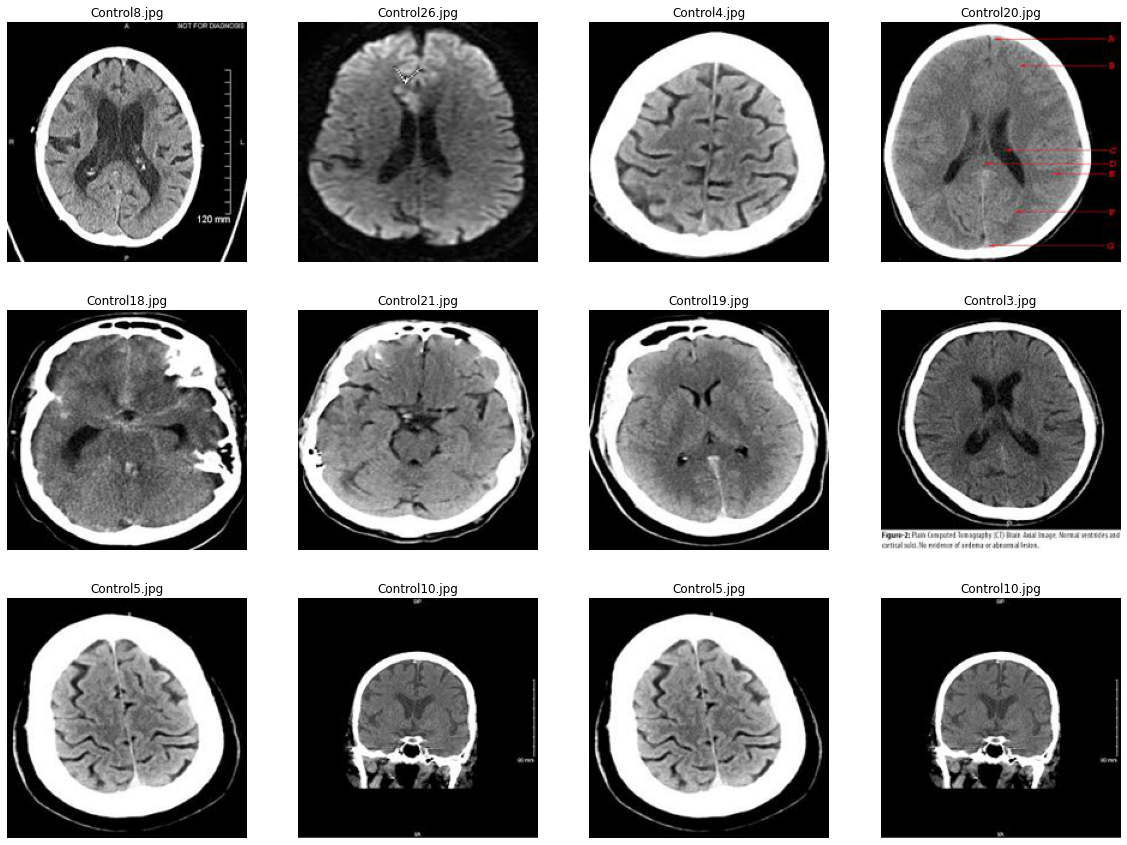

In [24]:
# Jumlah image horizontal
c = 4
# Jumlah image vertikal
r = 3

# Mendefinisikan panjang lebar grid image
_, axes_list = plt.subplots(r, c, figsize=(5*c, 5*r))

# Looping untuk menampilkan image
for axes in axes_list:
  for ax in axes:
  	# Menghilangkan skala pada sumbu gambar
    ax.axis("off")
    # Memili nama file image secara random
    img = np.random.choice(file_names)
    # Membaca file image dengna memanggil fungsi load_img(img)
    ax.imshow(load_img(img))
    # Mengatur judul tiap img berdasarkan nama file image
    ax.set_title(img)